# PYTHON PANDAS PART 7

## Categorical Data

In [1]:
import pandas as pd; import numpy as np

In [2]:
data = pd.Series(["erdem","jack","angela","lisa"]*3)
data

0      erdem
1       jack
2     angela
3       lisa
4      erdem
5       jack
6     angela
7       lisa
8      erdem
9       jack
10    angela
11      lisa
dtype: object

In [3]:
pd.unique(data)

array(['erdem', 'jack', 'angela', 'lisa'], dtype=object)

In [4]:
pd.value_counts(data)

erdem     3
jack      3
angela    3
lisa      3
dtype: int64

In [5]:
values = pd.Series([0,1,0,0]*3)

In [7]:
names = pd.Series(["erdem","jack"])
names.take(values)

0    erdem
1     jack
0    erdem
0    erdem
0    erdem
1     jack
0    erdem
0    erdem
0    erdem
1     jack
0    erdem
0    erdem
dtype: object

In [8]:
data

0      erdem
1       jack
2     angela
3       lisa
4      erdem
5       jack
6     angela
7       lisa
8      erdem
9       jack
10    angela
11      lisa
dtype: object

In [17]:
N = len(data)
df = pd.DataFrame({"name":data,
                   "no": np.arange(N),
                   "points": np.random.randint(40,100,size = N),
                   "kilogram": np.random.uniform(50,70,size = N)
                  },
                 columns = ["no","name","points","kilogram"]
                 )
df

,no,name,points,kilogram
0,0,erdem,81,64.172237
1,1,jack,76,67.398770
2,2,angela,75,54.960123
3,3,lisa,65,53.627588
4,4,erdem,78,56.078235
5,5,jack,84,68.799942
6,6,angela,48,67.794790
7,7,lisa,60,51.623835
8,8,erdem,94,60.850142
9,9,jack,80,52.618534


In [18]:
type(df["name"])

pandas.core.series.Series

In [19]:
name_cat = df["name"].astype("category")
name_cat

0      erdem
1       jack
2     angela
3       lisa
4      erdem
5       jack
6     angela
7       lisa
8      erdem
9       jack
10    angela
11      lisa
Name: name, dtype: category
Categories (4, object): ['angela', 'erdem', 'jack', 'lisa']

In [21]:
x = name_cat.values
x.categories

Index(['angela', 'erdem', 'jack', 'lisa'], dtype='object')

In [22]:
x.codes

array([1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3], dtype=int8)

In [23]:
df["name"]= df["name"].astype("category")
df.name

0      erdem
1       jack
2     angela
3       lisa
4      erdem
5       jack
6     angela
7       lisa
8      erdem
9       jack
10    angela
11      lisa
Name: name, dtype: category
Categories (4, object): ['angela', 'erdem', 'jack', 'lisa']

In [24]:
data_cat = pd.Categorical(list("abcde"))
data_cat

['a', 'b', 'c', 'd', 'e']
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [26]:
pd.Categorical(["banana","apple","lemon","orange"])

['banana', 'apple', 'lemon', 'orange']
Categories (4, object): ['apple', 'banana', 'lemon', 'orange']

In [28]:
humans = ["baby","child","teenage","old"]
codes = [0,1,2,3,0,0]
humans_cat = pd.Categorical.from_codes(codes,humans)
humans_cat

['baby', 'child', 'teenage', 'old', 'baby', 'baby']
Categories (4, object): ['baby', 'child', 'teenage', 'old']

In [29]:
humans_cat = pd.Categorical.from_codes(codes,humans,ordered=True)
humans_cat

['baby', 'child', 'teenage', 'old', 'baby', 'baby']
Categories (4, object): ['baby' < 'child' < 'teenage' < 'old']

In [30]:
humans_cat.as_ordered()

['baby', 'child', 'teenage', 'old', 'baby', 'baby']
Categories (4, object): ['baby' < 'child' < 'teenage' < 'old']

## Working with Categorical Data

In [32]:
data = np.random.randn(1000)

In [33]:
piece = pd.qcut(data,4)
piece

[(-0.0512, 0.638], (0.638, 3.073], (-0.733, -0.0512], (-0.0512, 0.638], (-3.9619999999999997, -0.733], ..., (-0.0512, 0.638], (0.638, 3.073], (-3.9619999999999997, -0.733], (-3.9619999999999997, -0.733], (-0.0512, 0.638]]
Length: 1000
Categories (4, interval[float64, right]): [(-3.9619999999999997, -0.733] < (-0.733, -0.0512] < (-0.0512, 0.638] < (0.638, 3.073]]

In [34]:
type(piece)

pandas.core.arrays.categorical.Categorical

In [35]:
piece = pd.qcut(data,4,labels = ["q1","q2","q3","q4"])
piece

['q3', 'q4', 'q2', 'q3', 'q1', ..., 'q3', 'q4', 'q1', 'q1', 'q3']
Length: 1000
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [36]:
piece = pd.Series(piece,name="quartil")
piece

0      q3
1      q4
2      q2
3      q3
4      q1
       ..
995    q3
996    q4
997    q1
998    q1
999    q3
Name: quartil, Length: 1000, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [38]:
pd.Series(data).groupby(piece).agg(["count","min","max"]).reset_index()

,quartil,count,min,max
0,q1,250,-3.961100,-0.734460
1,q2,250,-0.732863,-0.051215
2,q3,250,-0.051156,0.637879
3,q4,250,0.639861,3.072908


In [39]:
N = 10000000
coun = pd.Series(np.random.randn(N))
label = pd.Series(["a","b","c","d"]*(N//4))
cat = label.astype("category")

In [40]:
label.memory_usage()

80000128

In [41]:
cat.memory_usage()

10000332

In [42]:
s = pd.Series(["a","b","c","d"]*2)
s_cat = s.astype("category")
s_cat

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [43]:
s_cat.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [44]:
s_cat.cat.categories

Index(['a', 'b', 'c', 'd'], dtype='object')

In [45]:
new_cat = ["a","b","c","d","e"]
s_cat.cat.set_categories(new_cat)

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

In [46]:
s2_cat = s_cat[s_cat.isin(["a","b"])]
s2_cat

0    a
1    b
4    a
5    b
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [48]:
s2_cat.cat.remove_unused_categories()

0    a
1    b
4    a
5    b
dtype: category
Categories (2, object): ['a', 'b']

## Dummy

In [49]:
s_cat

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

In [50]:
pd.get_dummies(s_cat)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## Pratical Data Analysis

In [51]:
df = pd.read_csv("C:\\Users\\erdem\\Desktop\\Data 101\\Pandas 101\\ca_san_diego_2019_02_25.csv")
# https://github.com/TirendazAcademy/PANDAS-TUTORIAL/blob/main/DataSets/ca_san_diego_2019_02_25.csv
df.head()

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Equipment Violation


In [52]:
df.tail()

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
390994,390995,2017-03-31,23:45:00,830,20.0,black,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation
390995,390996,2017-03-31,23:45:00,710,65.0,hispanic,male,vehicular,NaN,True,False,citation,NaN,NaN,NaN,NaN,NaN,NaN,Moving Violation
390996,390997,2017-03-31,23:49:00,620,23.0,hispanic,male,vehicular,False,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,Radio Call/Citizen Contact
390997,390998,2017-03-31,23:55:00,710,NaN,hispanic,male,vehicular,NaN,True,False,citation,NaN,NaN,NaN,NaN,NaN,NaN,Moving Violation
390998,390999,2017-03-31,23:58:00,310,26.0,white,female,vehicular,NaN,False,True,warning,NaN,NaN,NaN,NaN,NaN,NaN,Equipment Violation


In [53]:
df.shape

(390999, 19)

In [57]:
df.dtypes

raw_row_number         int64
date                  object
time                  object
service_area          object
subject_age          float64
subject_race          object
subject_sex           object
type                  object
arrest_made           object
citation_issued       object
warning_issued        object
outcome               object
contraband_found      object
search_conducted      object
search_person         object
search_vehicle        object
search_basis          object
reason_for_search     object
reason_for_stop       object
dtype: object

In [59]:
df.isnull().sum()

raw_row_number            0
date                    132
time                   1256
service_area              0
subject_age           12644
subject_race           1398
subject_sex             806
type                      0
arrest_made           35022
citation_issued       32712
warning_issued        32712
outcome               40047
contraband_found     379835
search_conducted      37096
search_person        376459
search_vehicle       376459
search_basis         374173
reason_for_search    376343
reason_for_stop         266
dtype: int64

In [60]:
df.date.head()

0    2014-01-01
1    2014-01-01
2    2014-01-01
3    2014-01-01
4    2014-01-01
Name: date, dtype: object

In [61]:
df.columns

Index(['raw_row_number', 'date', 'time', 'service_area', 'subject_age',
       'subject_race', 'subject_sex', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'search_conducted',
       'search_person', 'search_vehicle', 'search_basis', 'reason_for_search',
       'reason_for_stop'],
      dtype='object')

In [62]:
df["time"].head()

0    01:25:00
1    05:47:00
2    07:46:00
3    08:10:00
4    08:35:00
Name: time, dtype: object

In [63]:
df[["date","time"]].head()

,date,time
0,2014-01-01,01:25:00
1,2014-01-01,05:47:00
2,2014-01-01,07:46:00
3,2014-01-01,08:10:00
4,2014-01-01,08:35:00


In [66]:
df.dropna(axis="columns",how="all").shape

(390999, 19)

In [68]:
df.dropna(axis="columns",how="any").shape

(390999, 3)

In [69]:
df.reason_for_stop.value_counts()

Moving Violation                      285562
Equipment Violation                    99577
Radio Call/Citizen Contact              1941
Muni, County, H&S Code                  1349
Personal Knowledge/Informant             884
Suspect Info (I.S., Bulletin, Log)       539
No Cause Specified on a Card             430
Personal Observ/Knowledge                104
Muni                                      85
UNI, &County, H&&S Code                   73
Other                                     39
Suspect Info (I.S.                        39
MUNI, County, H&S Code                    29
&Moving Violation                         21
Suspect Info                              17
MUNI                                       8
none listed                                6
not marked                                 4
&Equipment Violation                       3
Bicycle                                    2
NOT SPECIFIED                              2
NOTHING MARKED                             2
NOT MARKED

In [70]:
df[df.reason_for_stop=="Moving Violation"].subject_sex.value_counts()

male      179242
female    105765
Name: subject_sex, dtype: int64

In [71]:
df[df.reason_for_stop=="Moving Violation"].subject_sex.value_counts(normalize = True)

male      0.628904
female    0.371096
Name: subject_sex, dtype: float64

In [72]:
df.groupby("subject_sex").reason_for_stop.value_counts(normalize = True)

subject_sex  reason_for_stop                   
female       Moving Violation                      0.773651
             Equipment Violation                   0.215736
             Radio Call/Citizen Contact            0.003606
             Muni, County, H&S Code                0.002516
             Personal Knowledge/Informant          0.001609
             No Cause Specified on a Card          0.001287
             Suspect Info (I.S., Bulletin, Log)    0.000929
             Personal Observ/Knowledge             0.000234
             Other                                 0.000110
             UNI, &County, H&&S Code               0.000110
             &Moving Violation                     0.000044
             Suspect Info                          0.000044
             MUNI, County, H&S Code                0.000029
             &Equipment Violation                  0.000015
             NOT MARKED                            0.000015
             NOTHING MARKED                        0

In [74]:
df.date.str.slice(0,4).value_counts()

2014    144164
2015    115422
2016    103051
2017     28230
Name: date, dtype: int64

In [76]:
unite = df.date.str.cat(df.time, sep = " ")
df["stop_datetime"] = pd.to_datetime(unite)
df.head()

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,stop_datetime
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 01:25:00
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 05:47:00
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 07:46:00
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Moving Violation,2014-01-01 08:10:00
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,NaN,NaN,NaN,NaN,Equipment Violation,2014-01-01 08:35:00


In [78]:
df.dtypes

raw_row_number                int64
date                         object
time                         object
service_area                 object
subject_age                 float64
subject_race                 object
subject_sex                  object
type                         object
arrest_made                  object
citation_issued              object
warning_issued               object
outcome                      object
contraband_found             object
search_conducted             object
search_person                object
search_vehicle               object
search_basis                 object
reason_for_search            object
reason_for_stop              object
stop_datetime        datetime64[ns]
dtype: object

In [79]:
df.stop_datetime.dt.month

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
390994    3.0
390995    3.0
390996    3.0
390997    3.0
390998    3.0
Name: stop_datetime, Length: 390999, dtype: float64

In [81]:
df["arrest_made"] = df.arrest_made.astype(bool)
df.dtypes

raw_row_number                int64
date                         object
time                         object
service_area                 object
subject_age                 float64
subject_race                 object
subject_sex                  object
type                         object
arrest_made                    bool
citation_issued              object
warning_issued               object
outcome                      object
contraband_found             object
search_conducted             object
search_person                object
search_vehicle               object
search_basis                 object
reason_for_search            object
reason_for_stop              object
stop_datetime        datetime64[ns]
dtype: object

In [82]:
df.arrest_made.value_counts()

False    351060
True      39939
Name: arrest_made, dtype: int64

In [83]:
df.arrest_made.mean()

0.10214604129422326

In [84]:
df.groupby(df.stop_datetime.dt.hour).arrest_made.mean()

stop_datetime
0.0     0.113073
1.0     0.140684
2.0     0.141698
3.0     0.127541
4.0     0.105165
5.0     0.063767
6.0     0.114924
7.0     0.075330
8.0     0.064346
9.0     0.061174
10.0    0.058614
11.0    0.078432
12.0    0.015655
13.0    0.053309
14.0    0.075281
15.0    0.132653
16.0    0.163263
17.0    0.171670
18.0    0.169753
19.0    0.139718
20.0    0.152607
21.0    0.125060
22.0    0.102684
23.0    0.105551
Name: arrest_made, dtype: float64

In [85]:
%matplotlib inline

<Axes: xlabel='stop_datetime'>

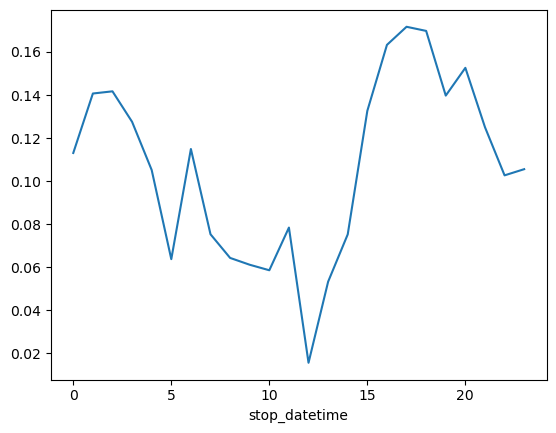

In [86]:
df.groupby(df.stop_datetime.dt.hour).arrest_made.mean().plot()

## Practical Graphics

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
%matplotlib inline

In [89]:
iris = pd.read_csv("C:\\Users\\erdem\\Desktop\\Data 101\\Pandas 101\\iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

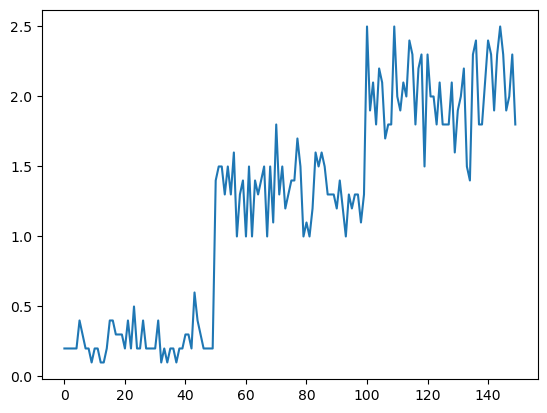

In [91]:
iris.PetalWidthCm.plot()

In [93]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: >

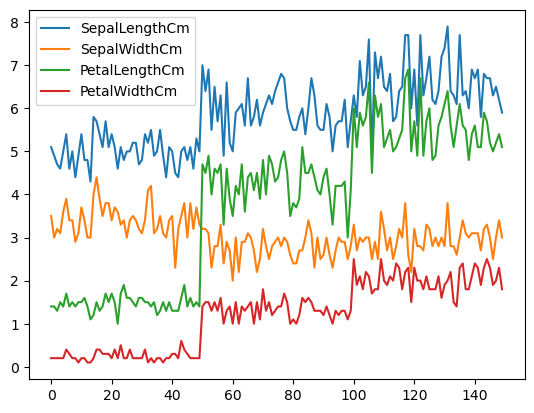

In [95]:
iris_plt = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm','Species']]
iris_plt.plot()

<Axes: >

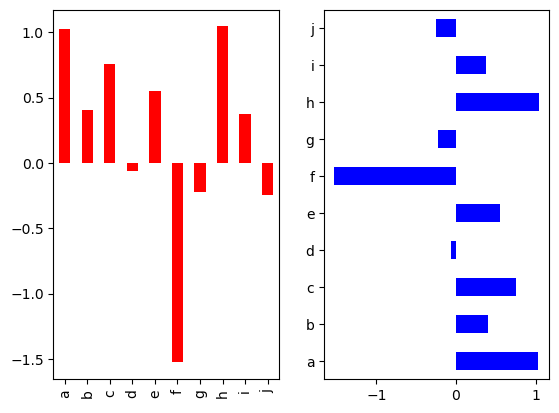

In [98]:
fig , axes = plt.subplots(1,2)
data = pd.Series(np.random.randn(10), index = list("abcdefghij"))
data.plot.bar(ax = axes[0],color = "r", alpha=1) # vertical
data.plot.barh(ax= axes[1], color = "b", alpha=1) # horizontal

In [102]:
df = pd.DataFrame(abs(np.random.randn(5,3)),
                  index = ["one","two","three","four","five"],
                  columns = pd.Index(list("ABC"))
                 )
df

,A,B,C
one,0.378430,0.367830,1.388144
two,0.007984,2.293411,1.140366
three,0.246862,0.439939,0.729787
four,0.196896,1.163464,1.227736
five,1.664887,0.765115,1.095700


<Axes: >

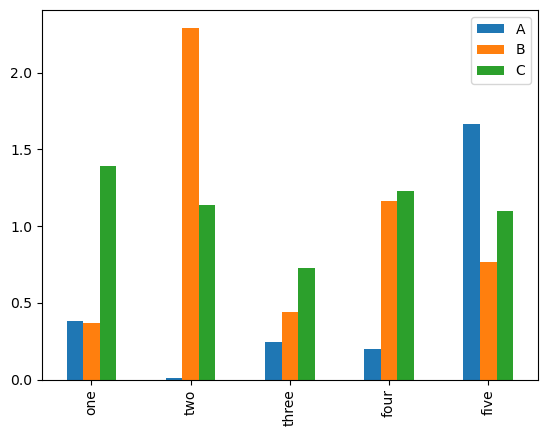

In [103]:
df.plot.bar()

<Axes: >

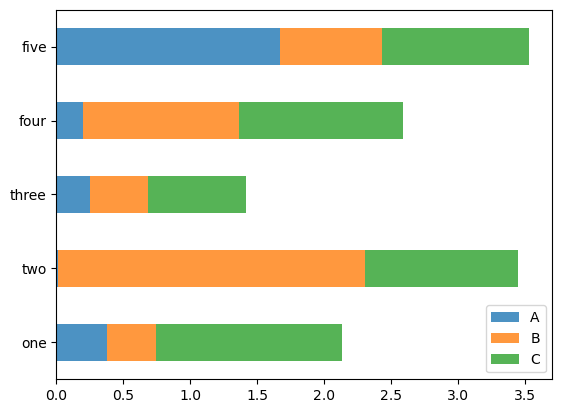

In [104]:
df.plot.barh(stacked = True, alpha = 0.8)

In [105]:
tip = pd.read_csv("C:\\Users\\erdem\\Desktop\\Data 101\\Pandas 101\\tips.csv")
tip.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [106]:
party_coun = pd.crosstab(tip["day"],tip["size"])
party_coun

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<Axes: xlabel='day'>

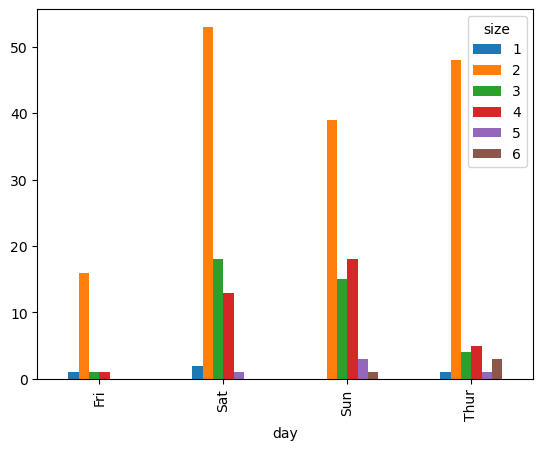

In [107]:
party_coun.plot.bar()

In [108]:
tip["tip_percentage"] = tip["tip"]/(tip["total_bill"]-tip["tip"])
tip.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,0.172069


<Axes: xlabel='day', ylabel='tip_percentage'>

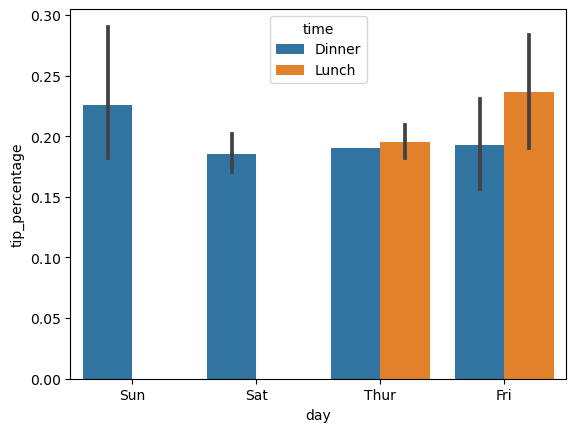

In [110]:
sns.barplot(x="day",y="tip_percentage",hue = "time",data = tip, orient= "v")

<Axes: ylabel='Frequency'>

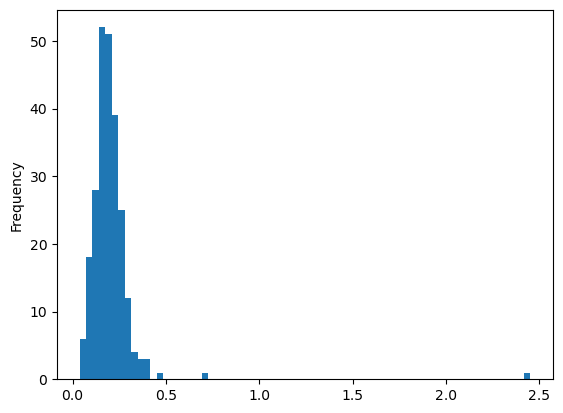

In [111]:
tip["tip_percentage"].plot.hist(bins = 70)

C:\Users\erdem\AppData\Local\Temp\ipykernel_26320\2872667636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tip["tip_percentage"], bins = 50, color = "r")


<Axes: xlabel='tip_percentage', ylabel='Density'>

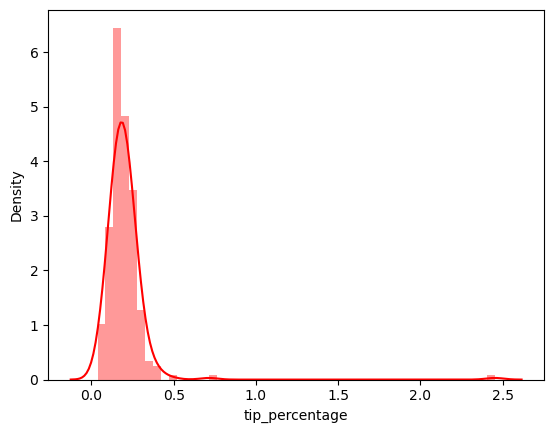

In [114]:
sns.distplot(tip["tip_percentage"], bins = 50, color = "r")

In [115]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

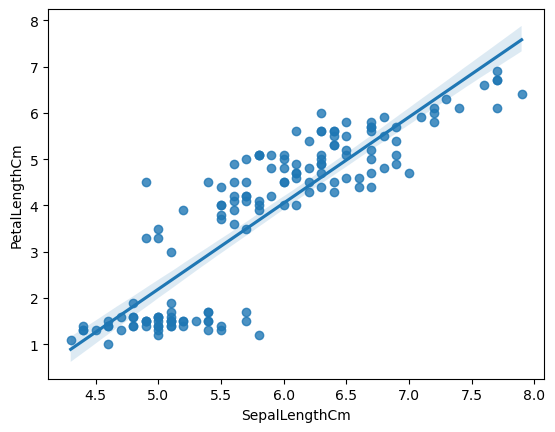

In [118]:
sns.regplot(x = "SepalLengthCm", y = "PetalLengthCm", data = iris)

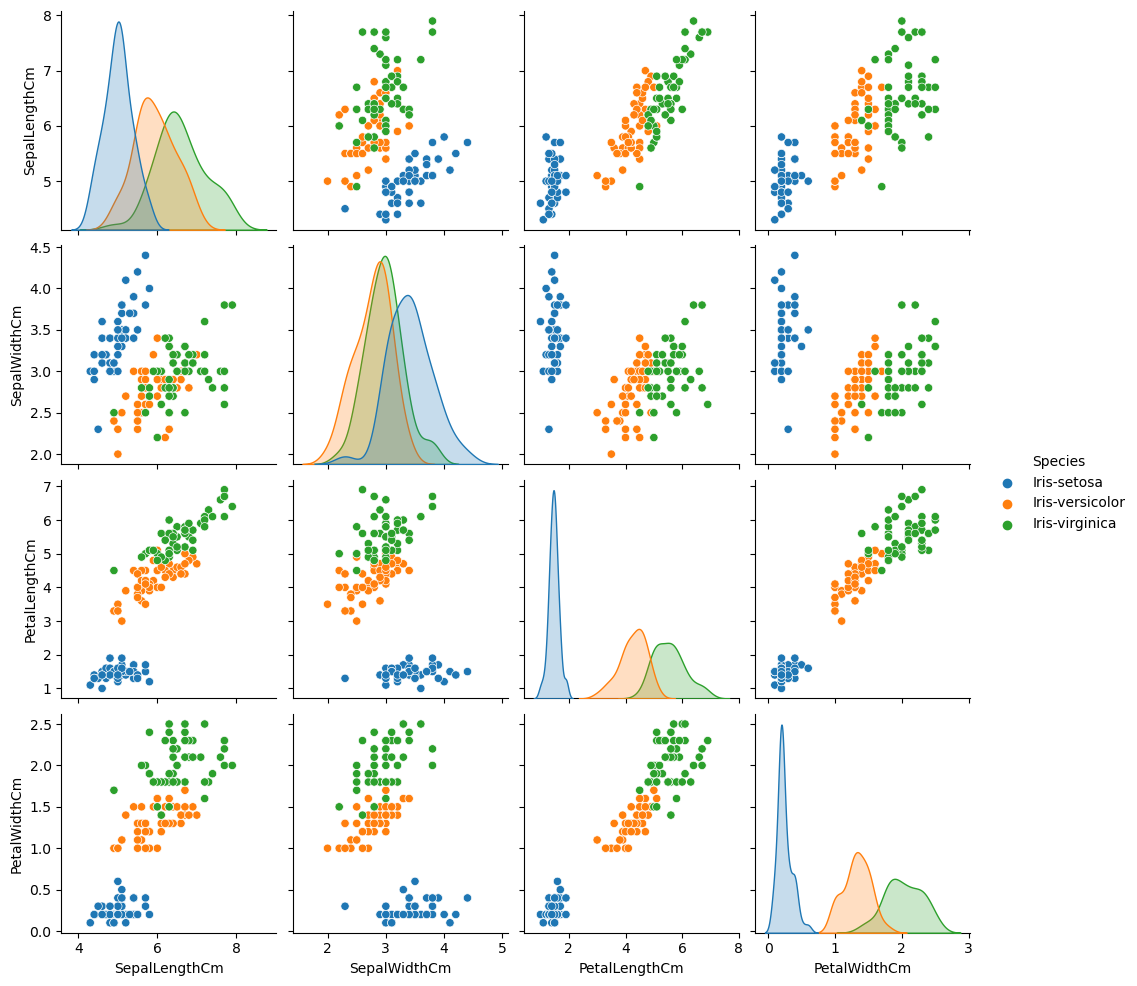

In [120]:
sns.pairplot(iris_plt, hue = 'Species')

In [121]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251,0.172069


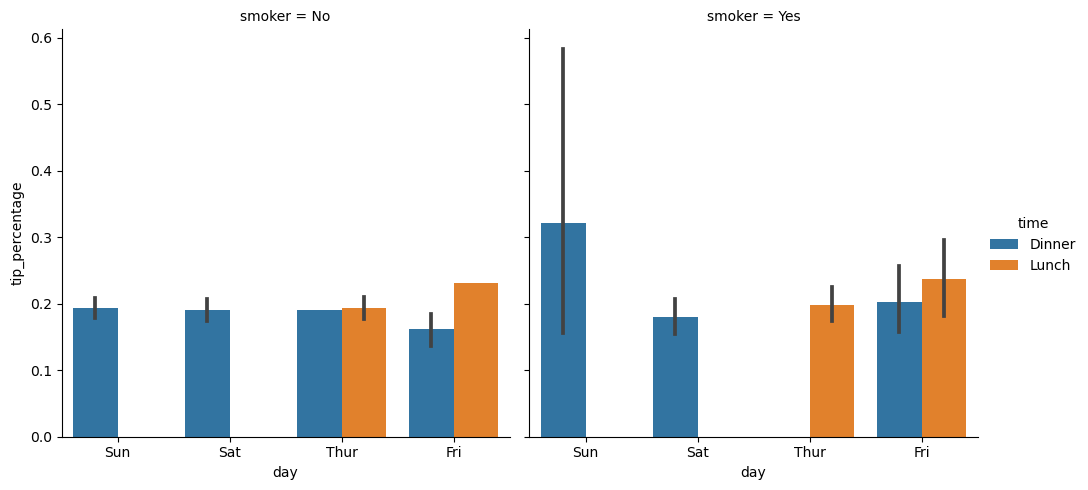

In [123]:
sns.catplot(x = "day", y = "tip_percentage", hue = "time", col = "smoker",
           kind = "bar", data= tip)

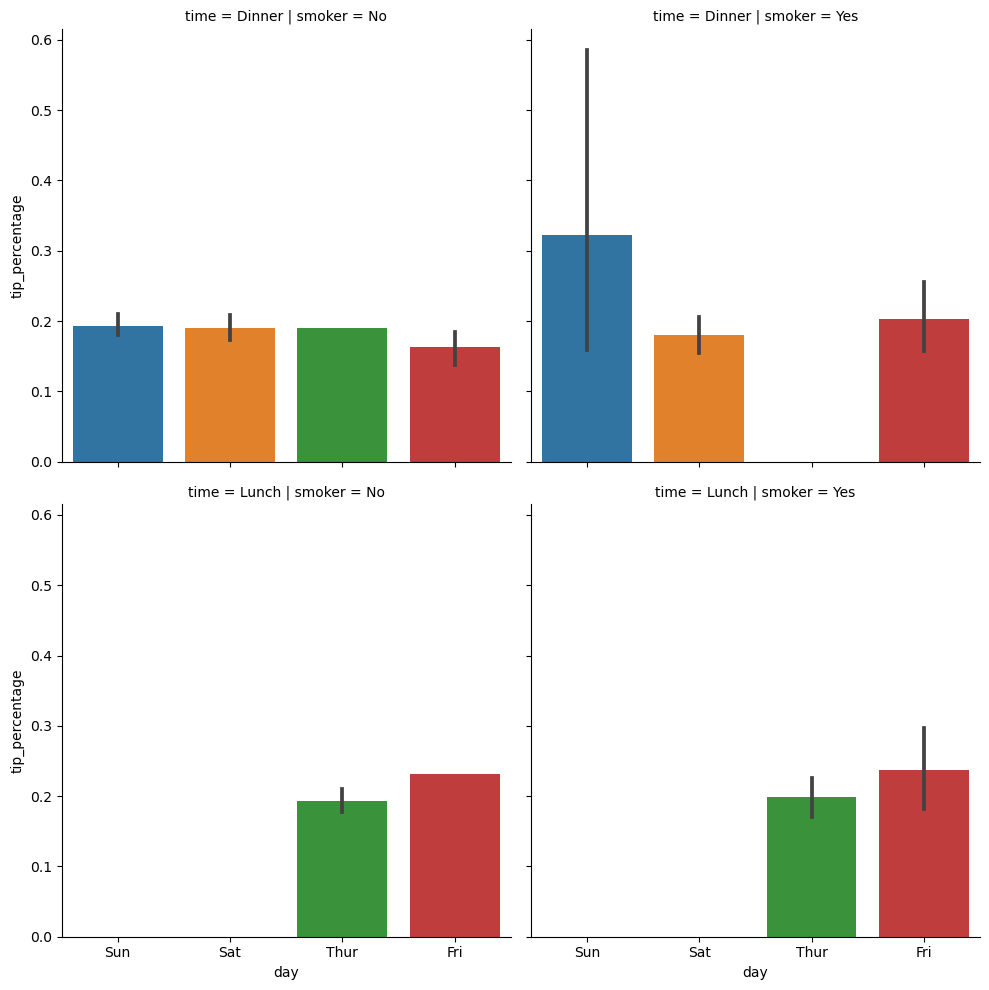

In [124]:
sns.catplot(x = "day", y = "tip_percentage", row = "time", col = "smoker",
           kind = "bar", data= tip)